**Importing the Required Libraries**

In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

**Analyzing and Cleaning the Dataset**

In [2]:
class DataAnalyzer:
  def __init__(self, df):
    self.df = df

  # Method to display basic information regarding the Dataset in both Original as well as Cleaned Versions
  def display_basic_info(self, version):
        # Displaying the first 10 rows of the Dataset
        print(f"The first 10 rows of the {version} Dataset are:")
        display(HTML(self.df.head(10).to_html()))

        # Displaying the last 5 rows of the Dataset
        print(f"\nThe last 5 rows of the {version} Dataset are:")
        display(HTML(self.df.tail().to_html()))

        # Displaying the information about the Dataset
        print(f"\nThe Basic Information about the {version} Dataset is as follows:")
        print(self.df.info())  # Providing information about the number of non-null values, data types

        # Providing the dimension of the Dataset
        print(f"\nDimension of the {version} Dataset is:")
        print(self.df.shape)

        # Providing the column attributes for the Dataset
        print(f"\nColumns in the {version} Dataset are:")
        print(self.df.columns)
        print(f"\nData Types of the Columns in the {version} Dataset are:")
        print(self.df.dtypes)

        # Providing the Columns and the Missing Values in these columns of the Dataset
        print(f"\nThe Columns and the Missing Values in these columns of the {version} Dataset are:")
        print(self.df.isnull().sum())
        print(f"\nThe Percentage of NULL/Missing Values in the {version} dataset is as follows:")
        df_cols = list(self.df.columns)
        cols_total_count = len(list(self.df.columns))
        cols_count = 0
        for loc, col in enumerate(df_cols):
            null_count = self.df[col].isnull().sum()  # Storing the number of null values on a column
            total_count = self.df[col].isnull().count() # Storing the total number of values present in that column
            percent_null = round(null_count/total_count*100, 2)
            if null_count > 0:
                cols_count += 1
                print('{} has {} null values: {}% null'.format(col, null_count, percent_null))
        cols_percent_null = round(cols_count/cols_total_count*100, 2)
        print('Out of {} total columns, {} contain null values'.format(cols_total_count, cols_count))

  # Method to clean the Dataset by Dropping NULL/Missing rows
  def cleaning_dataset(self):
        # Dropping Unwanted/Missing/NULL/Duplicate Columns
        self.df.drop_duplicates(inplace=True)

        unwanted_columns = ['OpenSourcer', 'OpenSource', 'EduOther', 'OrgSize', 'DevType', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent', 'Trans', 'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 'SurveyEase']
        self.df.drop(columns=unwanted_columns, inplace=True)

        # Dropping rows with any missing values
        self.df.dropna(inplace=True)

        # Set 'Respondent' as the index
        self.df.set_index('Respondent', inplace=True)

        # Set the column name for 'ConvertedComp' to 'Salary (USD)'
        self.df.rename(columns={"ConvertedComp": "Salary (USD)", "Hobbyist": "Coding (Hobby)"}, inplace=True)

        print("\nSuccessfully dropped unwanted columns and rows with missing values.\nThe cleaned dataset is as follows:\n")
        self.display_basic_info("Cleaned")

  # Method to clean the Dataset by checking for Outliers
  def check_for_outliers(self):
        max_salary = self.df['Salary (USD)'].max()
        min_salary = self.df['Salary (USD)'].min()
        median_salary = self.df['Salary (USD)'].median()
        q1_salary = self.df['Salary (USD)'].quantile(0.25)
        q3_salary = self.df['Salary (USD)'].quantile(0.75)

        self.df['Salary (USD)'].plot.box()
        plt.title('Box Plot of Salary (USD)')
        plt.ylabel('Salary (USD)')
        plt.show()

        return (max_salary, min_salary, median_salary, q1_salary, q3_salary)

  # Method to find out the number of Outliers in the 'Salary (USD)' column
  def outlier_count(self, col='Salary (USD)'):
    print("\n" + 15*'-' + col + 15*'-')
    q75, q25 = np.percentile(self.df[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((self.df[col] > max_val) | (self.df[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(self.df[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

  # Method to remove the Outliers from the Dataset
  def remove_outliers(self):
       # Calculate IQR
       q1 = self.df['Salary (USD)'].quantile(0.25)
       q3 = self.df['Salary (USD)'].quantile(0.75)
       iqr = q3 - q1

       # Define lower and upper bounds
       lower_bound = q1 - (1.5 * iqr)
       upper_bound = q3 + (1.5 * iqr)

       # Filter out outliers
       self.df = self.df[(self.df['Salary (USD)'] >= lower_bound) & (self.df['Salary (USD)'] <= upper_bound)]

       print("\nSuccessfully removed outliers from the 'Salary (USD)' column.")

       outlier_count = len(np.where((self.df['Salary (USD)'] > upper_bound) | (self.df['Salary (USD)'] < lower_bound))[0])
       outlier_percent = round(outlier_count/len(self.df['Salary (USD)'])*100, 2)
       print('Number of outliers: {}'.format(outlier_count))
       print('Percent of data that is outlier: {}%'.format(outlier_percent))

       return self.df


**Function to Create Heatmap for Developers who Know 'Python'
 and the ones who Desire 'Python'**

In [3]:
def create_programming_languages_heatmap(df, countries=None, branch='I am a developer by profession', column='LanguageWorkedWith', **kwargs):
    # Filtering the DataFrame based on countries and branch
    if countries:
        filtered_df = df[(df['Country'].isin(countries)) & (df['MainBranch'] == branch)]
    else:
        filtered_df = df[df['MainBranch'] == branch]

    # Extracting the specified column for all developers in the filtered DataFrame
    developer_languages = filtered_df[column]

    # Splitting the values into individual programming languages
    languages_list = developer_languages.str.split(';')

    # Flattening the list of languages
    all_languages = [language for sublist in languages_list for language in sublist]

    # Counting the frequency of each programming language
    language_counts = pd.Series(all_languages).value_counts()

    # Selecting the top 10 programming languages
    top_languages = language_counts.head(10)

    # Creating a DataFrame to store the frequency of top programming languages
    top_languages_df = pd.DataFrame(top_languages)

    # Creating the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(top_languages_df, cmap='viridis', annot=True, fmt='d', **kwargs)
    if column=='LanguageWorkedWith':
        plt.title('Top Programming Languages Used by Developers (Heatmap)')
    else:
        plt.title('Top Programming Languages Desired to be Learnt by Developers (Heatmap)')
    plt.xlabel('Frequency')
    plt.ylabel('Programming Languages')
    plt.xticks(rotation=45)
    plt.show()

**Function to Create Correlational Heatmap, Scatter Plot and Pair Plots for the Dataset**

In [4]:
def visualization_plots():
  new_df = df.copy()
  new_df['Knows_Python'] = new_df['LanguageWorkedWith'].str.contains('Python').astype(int)

  # Correlational Heatmap
  correlation_matrix = new_df.corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlational Heatmap')
  plt.show()

  # Scatter Plot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=new_df, x='Knows_Python', y='Salary (USD)')
  plt.title('Scatter Plot of Knows_Python vs Salary')
  plt.xlabel('Knows Python')
  plt.ylabel('Salary (USD)')
  plt.show()

  # Pair Plot
  pair_plot = sns.pairplot(new_df[['Knows_Python', 'Age', 'YearsCode', 'Salary (USD)']])
  plt.suptitle('Pair Plot of Knows_Python, Age, YearsCode, and Salary', y=1.02)
  pair_plot.fig.tight_layout()
  plt.show()

**Analyzing and Visualizing the Number of Developers from each Country(US, UK, India, Germany, Canada) that know 'Python' and desire to know 'Python'**

In [5]:
class PythonAwarenessAnalyzer:
    def __init__(self, df, country_group):
        self.df = df
        self.country_group = country_group
        self.country_respondents = self.df['Country'].value_counts()

    # Method to calculate the percentage of developers that know 'Python'
    def percentage_knows_python(self):
        country_uses_python = self.country_group['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
        know_python_df = pd.concat([self.country_respondents, country_uses_python], axis='columns')
        know_python_df.rename(columns={'Country': 'NumRespondents', 'LanguageWorkedWith': 'NumKnowsPython'}, inplace=True)
        know_python_df['PctKnowsPython'] = (know_python_df['NumKnowsPython']/know_python_df['NumRespondents']) * 100
        return know_python_df

    # Method to calculate the percentage of developers that desire to know 'Python'
    def percentage_desire_python(self):
        country_desire_python = self.country_group['LanguageDesireNextYear'].apply(lambda x: x.str.contains('Python').sum())
        desire_python_df = pd.concat([self.country_respondents, country_desire_python], axis='columns')
        desire_python_df.rename(columns={'Country': 'NumRespondents', 'LanguageDesireNextYear': 'NumDesirePython'}, inplace=True)
        desire_python_df['PctDesirePython'] = (desire_python_df['NumDesirePython']/desire_python_df['NumRespondents']) * 100
        return desire_python_df

    # Method to create a barplot comparing the DataFrames created in the above 2 methods
    def visualize_python_awareness(self):
        # Combining the above 2 Datasets and Providing a Graph for the same
        know_python_df = self.percentage_knows_python()
        desire_python_df = self.percentage_desire_python()

        python_combined_df = pd.merge(know_python_df, desire_python_df, left_index=True, right_index=True, how='inner')

        # Selecting the countries for which the graph is to be displayed
        selected_countries = ['United States', 'United Kingdom', 'India', 'Germany', 'Canada']
        filtered_df = python_combined_df.loc[selected_countries]

        # Visualization
        plt.figure(figsize=(20, 8))
        sns.barplot(data=filtered_df, x=filtered_df.index, y='PctKnowsPython', label='Knows Python')  # Plotting the percentage of people who know Python
        sns.barplot(data=filtered_df, x=filtered_df.index, y='PctDesirePython', color='salmon', label='Desire Python', alpha=0.5) # Plotting the percentage of people who desire to learn Python

        plt.title('Percentage of People Who Know Python vs. Desire to Learn Python by Country')
        plt.xlabel('Country', labelpad=20)
        plt.ylabel('Percentage of People', labelpad=20)
        plt.legend()
        plt.tight_layout()  # Adjusting the layout to prevent overlapping labels
        plt.show()

**Analyzing and Visualizing the Salaries of the Developers that know 'Python' and those who don't**

In [6]:
# Function to calculate the salaries from the countries mentioned above for developers that know Python and those who don't
def PythonandNonPythonSalaryCompare():
  # Filtering Respondents who know Python
  python_users_filt = df['LanguageWorkedWith'].str.contains('Python', na=False)
  python_users = df[python_users_filt]

  # Filtering respondents who don't know Python
  non_python_users = df[~python_users_filt]

  # Calculating mean salary for Python users by country
  python_avg_salary_by_country = python_users.groupby('Country')['Salary (USD)'].mean()

  # Calculating mean salary for non-Python users by country
  non_python_avg_salary_by_country = non_python_users.groupby('Country')['Salary (USD)'].mean()

  # Combining the results into a DataFrame
  comparison_df = pd.DataFrame({
      'Average Salary (Python Users)': python_avg_salary_by_country,
      'Average Salary (Non-Python Users)': non_python_avg_salary_by_country
  })

  return comparison_df

# Function to visualize the above mentioned function
def AverageSalaryPlot(df):
  plt.figure(figsize=(12, 8))
  df.plot(kind='bar', color=['skyblue', 'salmon'])
  plt.title('Comparison of Average Salaries between Python and Non-Python Users by Country', pad=20)
  plt.xlabel('Country')
  plt.ylabel('Average Salary (USD)')
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()

**Analyzing and Visualizing the Number of Students from these countries that Know 'Python' and those who desire to know 'Python'**

In [7]:
# Function to calculate the number of students from these countries that know 'Python' and those who desire to know 'Python'
def StudentPythonInterest(student_df):
    # Calculating the number of students from each country who know Python
    students_know_python = student_df[student_df['LanguageWorkedWith'].str.contains('Python')].groupby('Country').size()

    # Calculating the number of students from each country who desire to know Python
    students_desire_python = student_df[student_df['LanguageDesireNextYear'].str.contains('Python')].groupby('Country').size()

    # Calculating the total number of students from each country
    total_students = student_df.groupby('Country').size()

    # Calculating the percentage of students from each country who know Python
    percentage_know_python = (students_know_python / total_students) * 100

    # Calculating the percentage of students from each country who desire to know Python
    percentage_desire_python = (students_desire_python / total_students) * 100

    # Creating a DataFrame to store the results
    result_df = pd.DataFrame({
        'Total Students': total_students,
        'Students Know Python (%)': percentage_know_python.fillna(0),  # Fill NaN values with 0
        'Students Desire Python (%)': percentage_desire_python.fillna(0)  # Fill NaN values with 0
    })

    return result_df

# Function to visualize the above mentioned funtionality
def StudentPlot(result_df):
  plt.figure(figsize=(12, 8))
  result_df.loc[selected_countries][['Students Know Python (%)', 'Students Desire Python (%)']].plot(kind='bar', color=['skyblue', 'salmon'])
  plt.title('Percentage of Students from Each Country Who Know/Desire to Learn Python', pad=20)
  plt.xlabel('Country')
  plt.ylabel('Percentage of Students')
  plt.xticks(rotation=45)
  plt.legend(['Know Python', 'Desire Python'])
  plt.tight_layout()
  plt.show()

**Loading the Dataset from Google Drive**

In [8]:
# Loading the Dataset from the Google Drive into Notebook
filepath = '/content/drive/MyDrive/Dataset/survey_results_public.csv'
survey_dataset = pd.read_csv(filepath)

**Creating a DataFrame for the Loaded Dataset**

In [9]:
# Loading the Dataset into a DataFrame
df = pd.DataFrame(survey_dataset)

**Displaying Information about the DataFrame**

In [10]:
# Creating an instance of DataAnalyzer class
data_analyzer = DataAnalyzer(df)

# Displaying Information about the Original DataFrame before any changes
data_analyzer.display_basic_info("Original")

The first 10 rows of the Original Dataset are:


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,


The last 5 rows of the Original Dataset are:


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
88878,88377,NaN,Yes,Less than once a month but more than once per year,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,Firebase;SQLite,Firebase;MySQL;SQLite,Linux,Google Cloud Platform;Linux,jQuery,jQuery;Vue.js,Node.js,React Native;Unity 3D;Unreal Engine,Atom;Visual Studio;Visual Studio Code,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,What?,YouTube,NaN,Username,I don't remember,A few times per week,Find answers to specific questions;Learn how to do things I didn’t necessarily look for;Pass the time / relax,3-5 times per week,Stack Overflow was slightly faster,11-30 minutes,Yes,I have never participated in Q&A on Stack Overflow,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, I've heard of them, but I am not part of a private Q&A instance","No, not at all",NaN,Tech articles written by other developers;Tech meetups or events in your area;Courses on technologies you're interested in,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software is about the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than proprietary / closed source software","Independent contractor, freelancer, or self-employed",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88882,88863,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than proprietary / closed source software","Not employed, and not looking for work",Spain,"Yes, full-time","Professional degree (JD, MD, etc.)","Computer science, computer engineering, or software engin


The Basic Information about the Original Dataset is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87

**Displaying Information about the Cleaned Dataset**

In [11]:
# Displaying the information after Cleaning the Dataset
data_analyzer.cleaning_dataset()

# Function to convert the string values present in the 'YearsCode' column of the DataFrame into numeric values as per the follows
def convert_years_to_numeric(years):
  if years == 'Less than 1 year':
    return 0
  elif years == 'More than 50 years':
    return 51
  else:
    return int(years)

# Apply the custom function to convert the "YearsCode" column
df['YearsCode'] = df['YearsCode'].apply(convert_years_to_numeric)


Successfully dropped unwanted columns and rows with missing values.
The cleaned dataset is as follows:

The first 10 rows of the Cleaned Dataset are:


,MainBranch,Coding (Hobby),Employment,Country,Student,EdLevel,UndergradMajor,YearsCode,Salary (USD),WorkWeekHrs,LanguageWorkedWith,LanguageDesireNextYear,SocialMedia,Age,Gender
Respondent,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,3,8820.0,40.0,HTML/CSS,Elixir;HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",3,61000.0,80.0,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Reddit,22.0,Man
6,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,13,366420.0,15.0,Java;R;SQL,Python;Scala;SQL,YouTube,28.0,Man
9,I am a developer by profession,Yes,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",12,95179.0,32.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,Twitter,23.0,Man
13,I am a developer by profession,Yes,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering",17,90000.0,40.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL;TypeScript,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust;SQL;TypeScript;WebAssembly,Twitter,28.0,Man
14,I am a developer by profession,Yes,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or software engineering",13,57060.0,40.0,C++,C++,Reddit,31.0,Man
17,I am a developer by profession,Yes,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",5,65277.0,45.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;TypeScript,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript;TypeScript;WebAssembly,YouTube,29.0,Man
19,I am a developer by profession,Yes,Employed full-time,Brazil,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",14,31140.0,8.0,C#;HTML/CSS;Java;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript,WhatsApp,31.0,Man
20,"I am not primarily a developer, but I write code sometimes as part of my work",No,Employed full-time,Lithuania,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, or system administration",8,41244.0,140.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL,Facebook,38.0,Man



The last 5 rows of the Cleaned Dataset are:


,MainBranch,Coding (Hobby),Employment,Country,Student,EdLevel,UndergradMajor,YearsCode,Salary (USD),WorkWeekHrs,LanguageWorkedWith,LanguageDesireNextYear,SocialMedia,Age,Gender
Respondent,,,,,,,,,,,,,,,
88876,I am a developer by profession,Yes,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",8,180000.0,40.00,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;R;Scala,C#;Java;Kotlin;Scala,Reddit,23.0,Man
88877,I am a developer by profession,Yes,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",31,2000000.0,45.00,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;Scala;Swift;Other(s):,Bash/Shell/PowerShell;Clojure;HTML/CSS;Java;JavaScript;Kotlin;Python;Other(s):,Facebook,48.0,Man
88878,I am a developer by profession,Yes,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",12,130000.0,40.00,HTML/CSS;JavaScript;Scala;TypeScript,JavaScript;Rust;Scala;TypeScript,Twitter,26.0,Man
88879,I am a developer by profession,Yes,Employed full-time,Finland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering",17,82488.0,37.75,Bash/Shell/PowerShell;C++;Python,C++,YouTube,34.0,Man
88883,I am a developer by profession,Yes,Employed full-time,Greece,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",9,22915.0,48.00,Go;HTML/CSS;Java;JavaScript;Other(s):,C++;Go;Java;Rust,Reddit,33.0,Man



The Basic Information about the Cleaned Dataset is as follows:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43685 entries, 3 to 88883
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              43685 non-null  object 
 1   Coding (Hobby)          43685 non-null  object 
 2   Employment              43685 non-null  object 
 3   Country                 43685 non-null  object 
 4   Student                 43685 non-null  object 
 5   EdLevel                 43685 non-null  object 
 6   UndergradMajor          43685 non-null  object 
 7   YearsCode               43685 non-null  object 
 8   Salary (USD)            43685 non-null  float64
 9   WorkWeekHrs             43685 non-null  float64
 10  LanguageWorkedWith      43685 non-null  object 
 11  LanguageDesireNextYear  43685 non-null  object 
 12  SocialMedia             43685 non-null  object 
 13  Age                     436

**Checking Outliers in the Dataset and Displaying some statistics regarding the same**

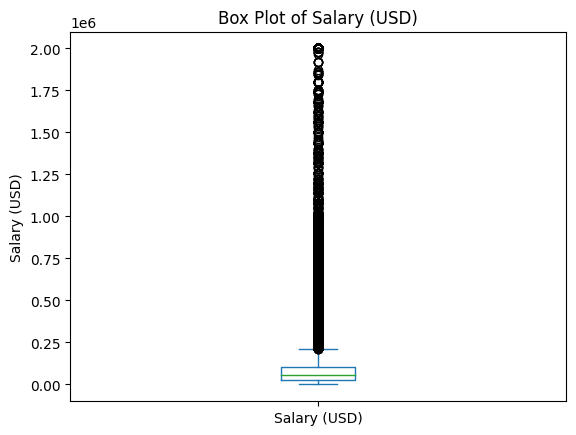


Checking to see if there are outliners present in the given cleaned dataset
Max Salary: 2000000.0
Min Salary: 0.0
Median Salary: 58881.0
First Quartile: 27498.0
Third Quartile: 101953.0
Standard Deviation of Salary: 288477.4367036074

---------------Salary (USD)---------------
Number of outliers: 3629
Percent of data that is outlier: 8.31%


In [12]:
#Checking for Outliers
max_salary, min_salary, median_salary, q1_salary, q3_salary = data_analyzer.check_for_outliers()
print("\nChecking to see if there are outliners present in the given cleaned dataset")
print("Max Salary:", max_salary)
print("Min Salary:", min_salary)
print("Median Salary:", median_salary)
print("First Quartile:", q1_salary)
print("Third Quartile:", q3_salary)

# Using Numpy to print Standard Deviation
std_dev_salary = np.std(df['Salary (USD)'])
print("Standard Deviation of Salary:", std_dev_salary)

# Checking the number of outlier points in the 'Salary (USD)' column
data_analyzer.outlier_count()

**Removing the above outliers**

In [13]:
df = data_analyzer.remove_outliers()
df.shape


Successfully removed outliers from the 'Salary (USD)' column.
Number of outliers: 0
Percent of data that is outlier: 0.0%


(40056, 15)

**Checking if the change has been reflected on the original DataFrame**

In [14]:
# Storing the Salaries in a Numpy Array
salary_data = df['Salary (USD)'].values

# Display the NumPy array
print(salary_data)
mean_salary = np.mean(salary_data)
median_salary = np.median(salary_data)
std_dev_salary = np.std(salary_data)
variance_salary = np.var(salary_data)
min_salary = np.min(salary_data)
max_salary = np.max(salary_data)

# Checking if the outliners are removed correctly
print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Standard Deviation of Salary:", std_dev_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)

[  8820.  61000.  95179. ... 130000.  82488.  22915.]
Mean Salary: 61813.064384861194
Median Salary: 53850.0
Standard Deviation of Salary: 45565.92520079788
Minimum Salary: 0.0
Maximum Salary: 213500.0


**Visualizing the 'Salary' column of the DataFrame after removing Outliers**

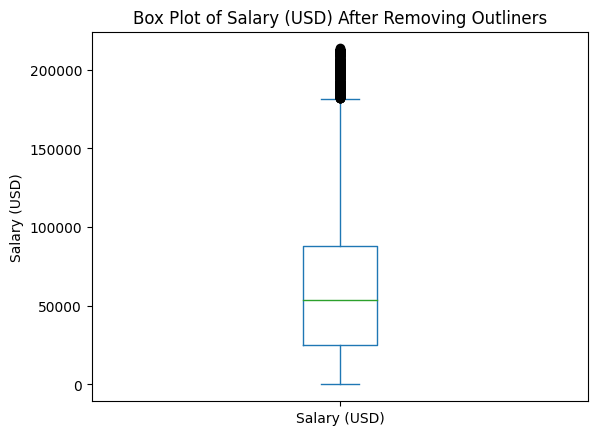

In [15]:
# Box plot after removing outliners:
df['Salary (USD)'].plot.box()
plt.title('Box Plot of Salary (USD) After Removing Outliners')
plt.ylabel('Salary (USD)')
plt.show()

**Using Matrices and Slicing to Display some information about other columns in the DataFrame**

In [16]:
# Representing the cleaned data in Matrix Form
data_matrix = df.values
print("The cleaned data looks something like this in matrix form:")
print(data_matrix)

# Slicing some part of the data
subset_data = df.loc[10:20, ['MainBranch', 'Coding (Hobby)', 'SocialMedia']]
display(HTML(subset_data.to_html()))

The cleaned data looks something like this in matrix form:
[['I am not primarily a developer, but I write code sometimes as part of my work'
  'Yes' 'Employed full-time' ... 'Reddit' 28.0 'Man']
 ['I am a developer by profession' 'No' 'Employed full-time' ... 'Reddit'
  22.0 'Man']
 ['I am a developer by profession' 'Yes' 'Employed full-time' ...
  'Twitter' 23.0 'Man']
 ...
 ['I am a developer by profession' 'Yes' 'Employed full-time' ...
  'Twitter' 26.0 'Man']
 ['I am a developer by profession' 'Yes' 'Employed full-time' ...
  'YouTube' 34.0 'Man']
 ['I am a developer by profession' 'Yes' 'Employed full-time' ...
  'Reddit' 33.0 'Man']]


,MainBranch,Coding (Hobby),SocialMedia
Respondent,,,
13,I am a developer by profession,Yes,Twitter
14,I am a developer by profession,Yes,Reddit
17,I am a developer by profession,Yes,YouTube
19,I am a developer by profession,Yes,WhatsApp
20,"I am not primarily a developer, but I write code sometimes as part of my work",No,Facebook


**Creating Count Plots for the above mentioned Countries and Analyzing the Categorical Data Present**

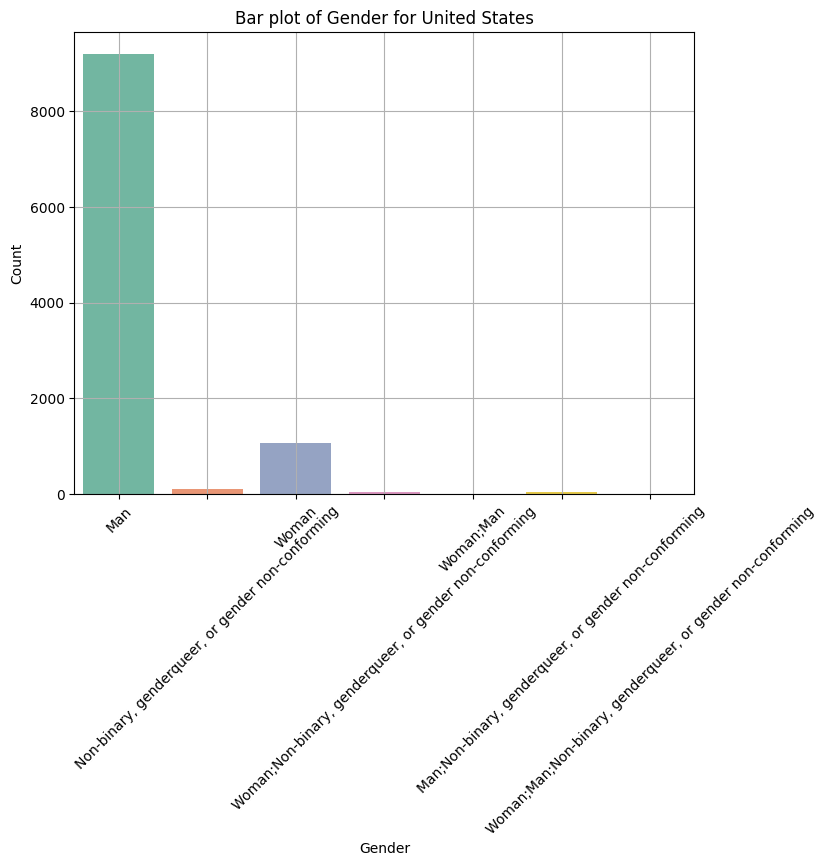

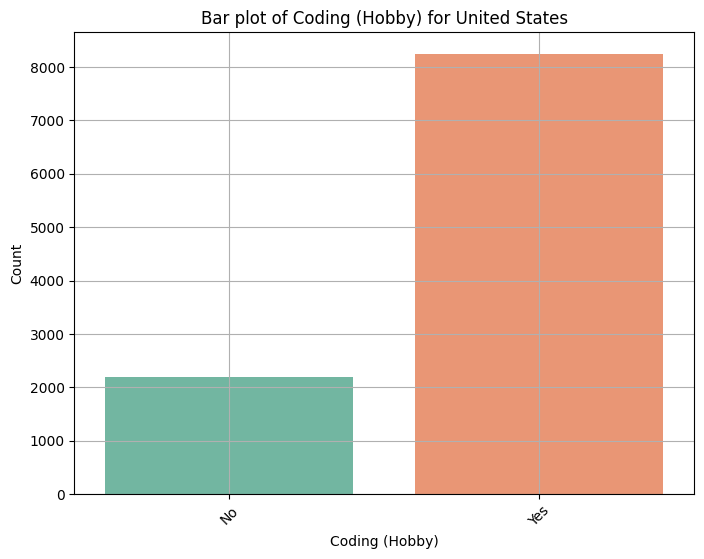

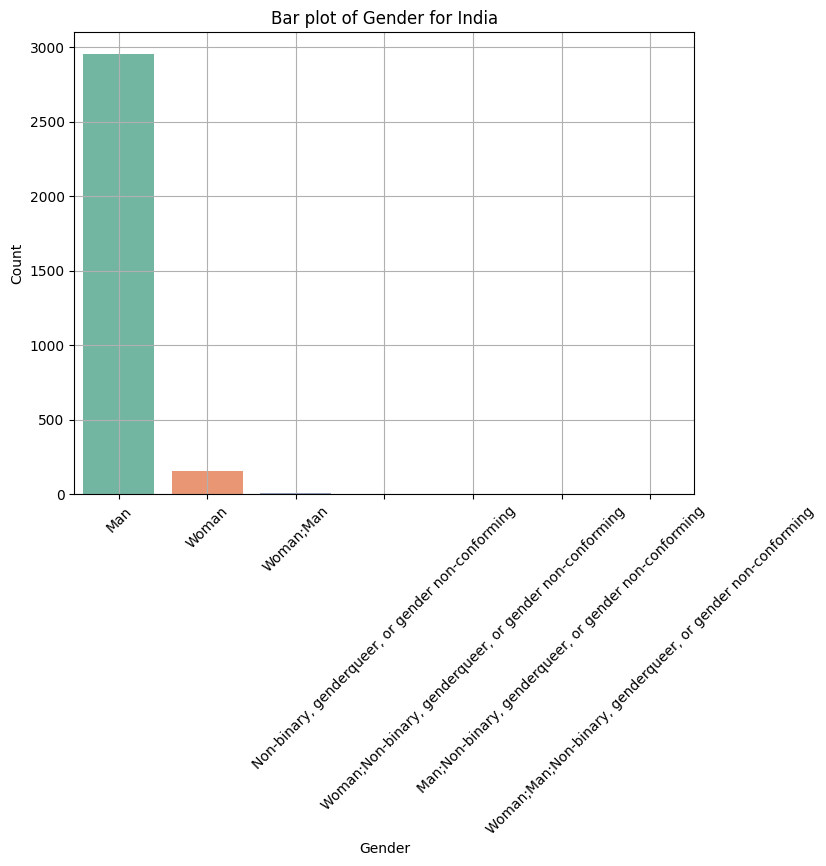

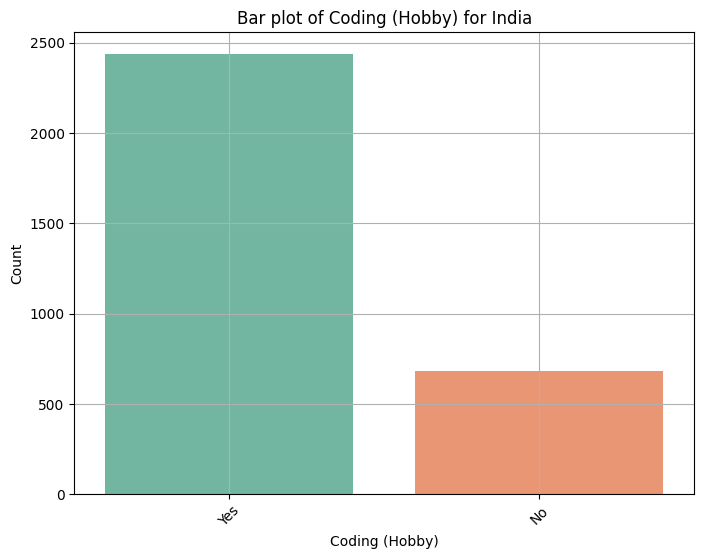

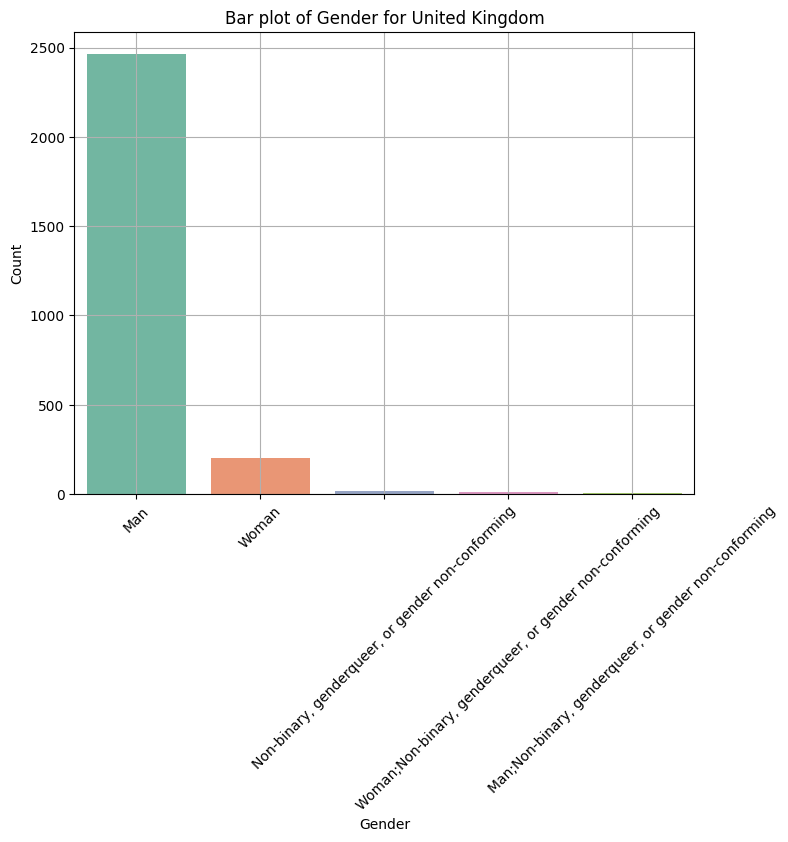

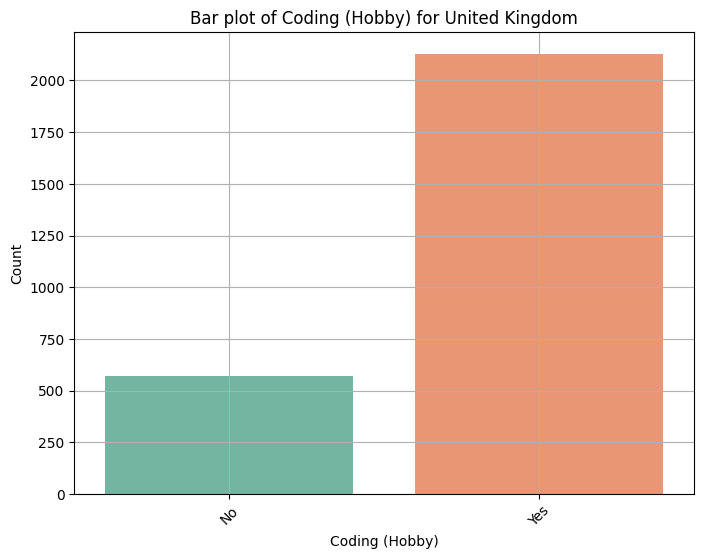

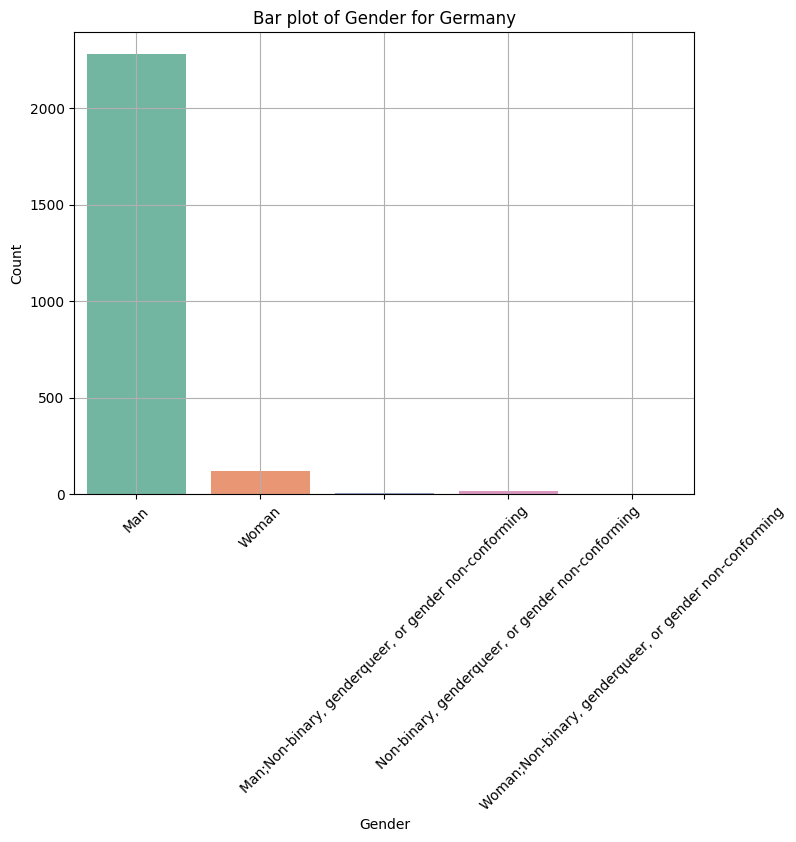

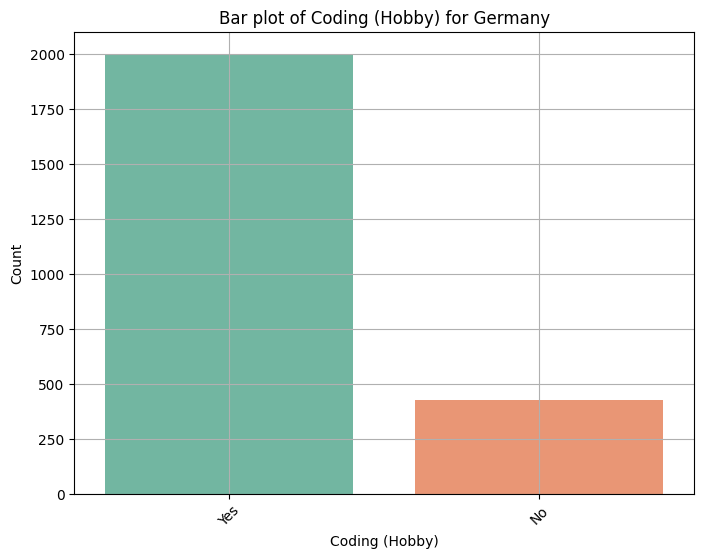

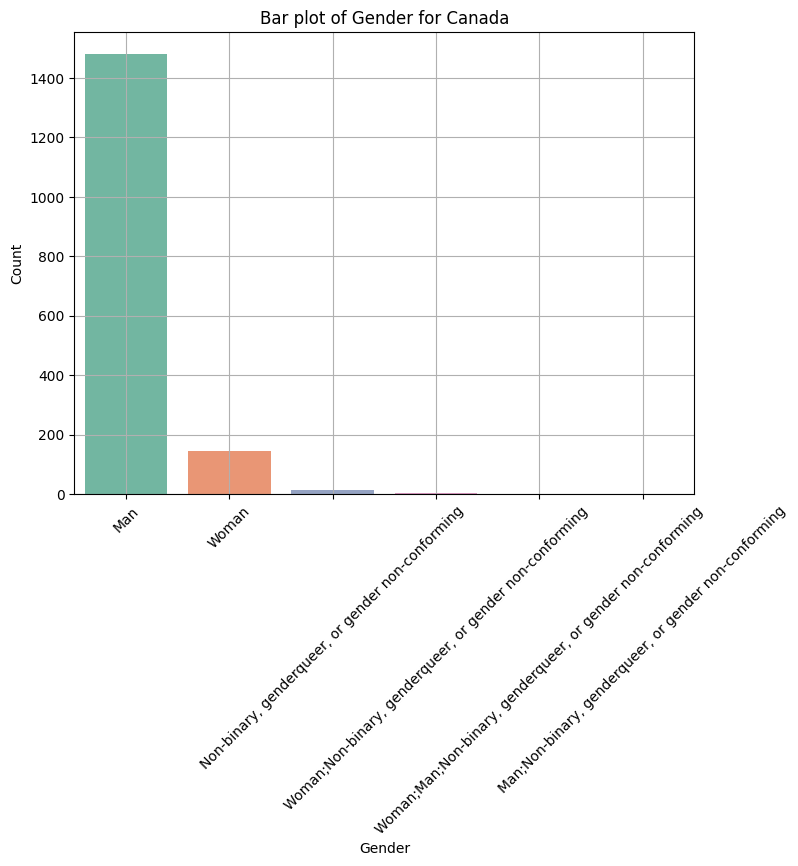

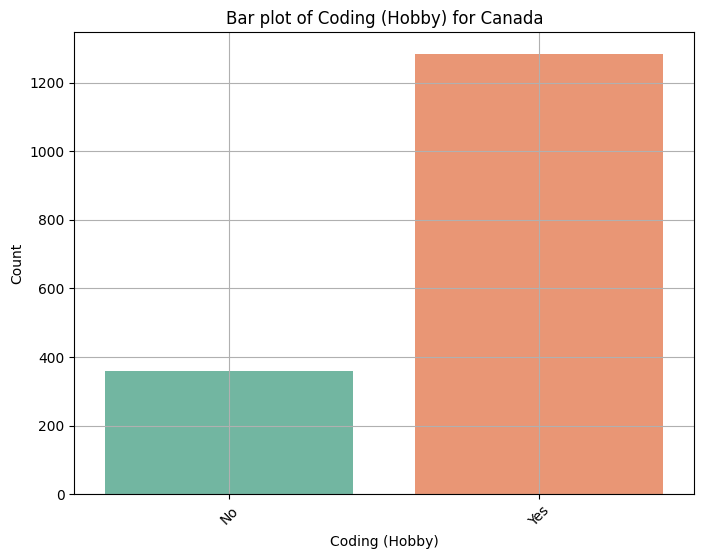

In [17]:
# Visualizaling Categorical Data
categorical_cols = ['Gender', 'Coding (Hobby)']

countries = ['United States', 'India', 'United Kingdom', 'Germany', 'Canada']

for country in countries:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Gender', data=df[df['Country'] == country], palette='Set2', hue='Gender', legend=False)
    plt.title(f'Bar plot of Gender for {country}')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Coding (Hobby)', data=df[df['Country'] == country], palette='Set2', hue='Coding (Hobby)', legend=False)
    plt.title(f'Bar plot of Coding (Hobby) for {country}')
    plt.xlabel('Coding (Hobby)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

**Calling the HeatMap and Visualization functions declared above to Visualize the ranking of 'Python' in programming languages among the developers and its correlation with other numerical values present in the DataFrame**

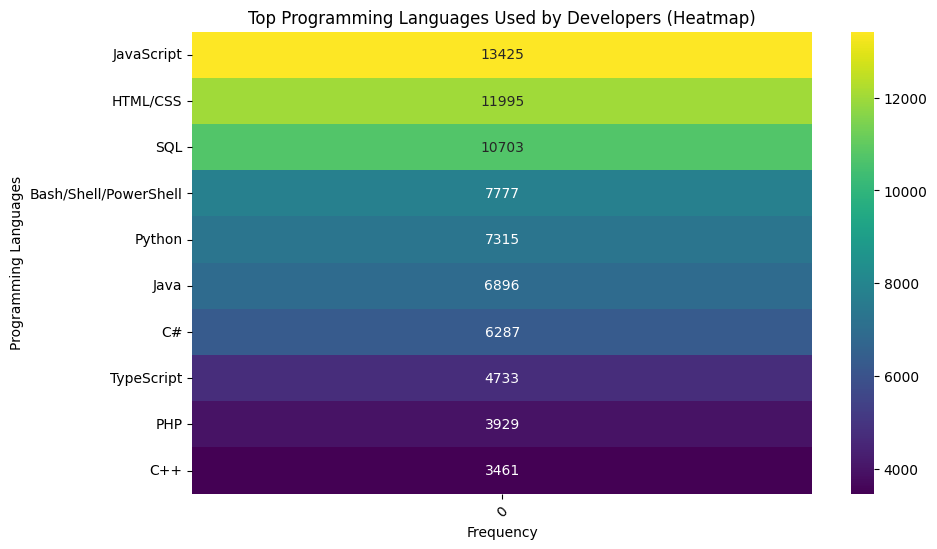

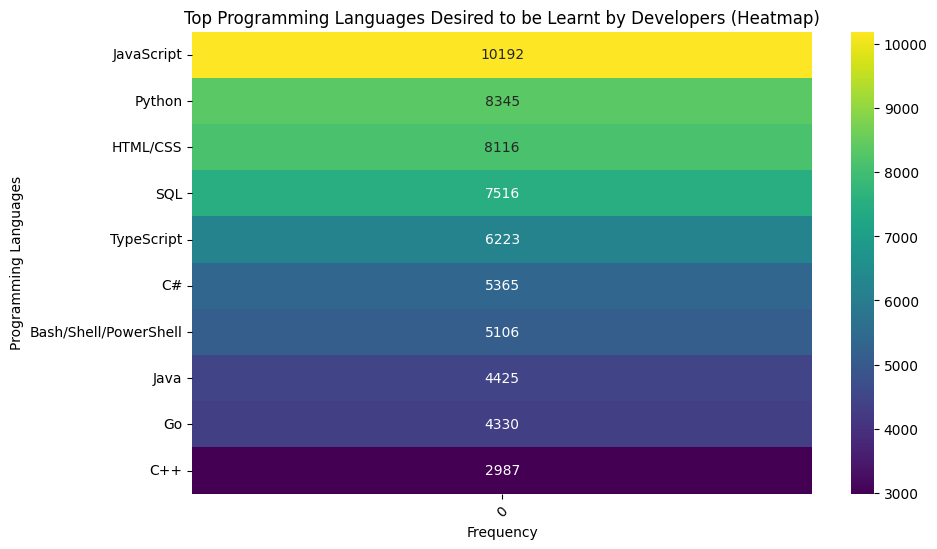

<ipython-input-4-c908510c59bb>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


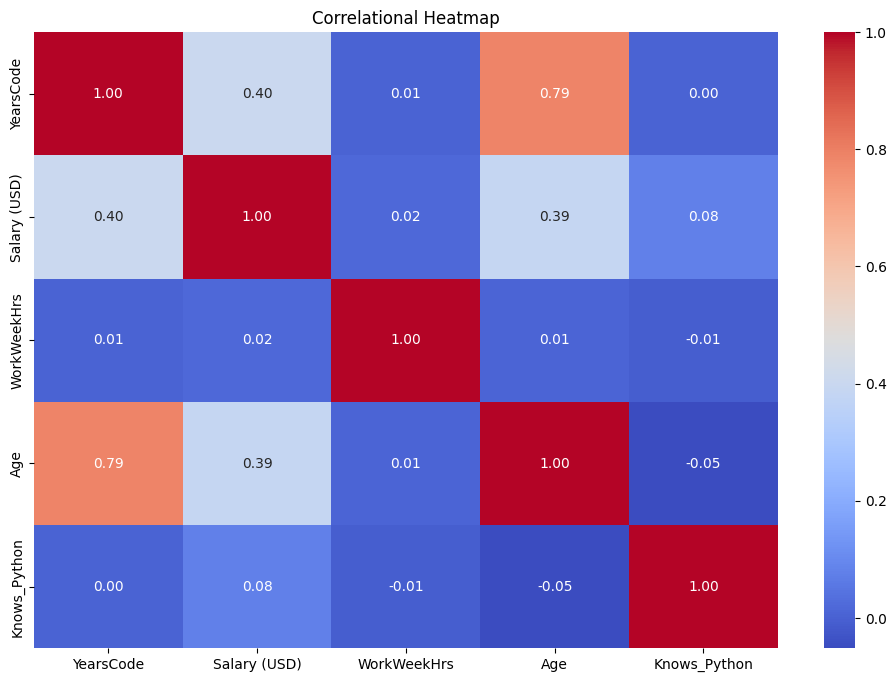

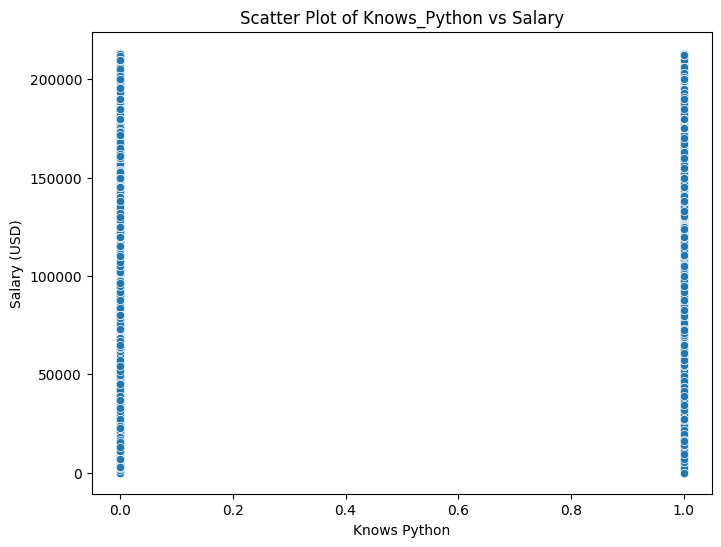

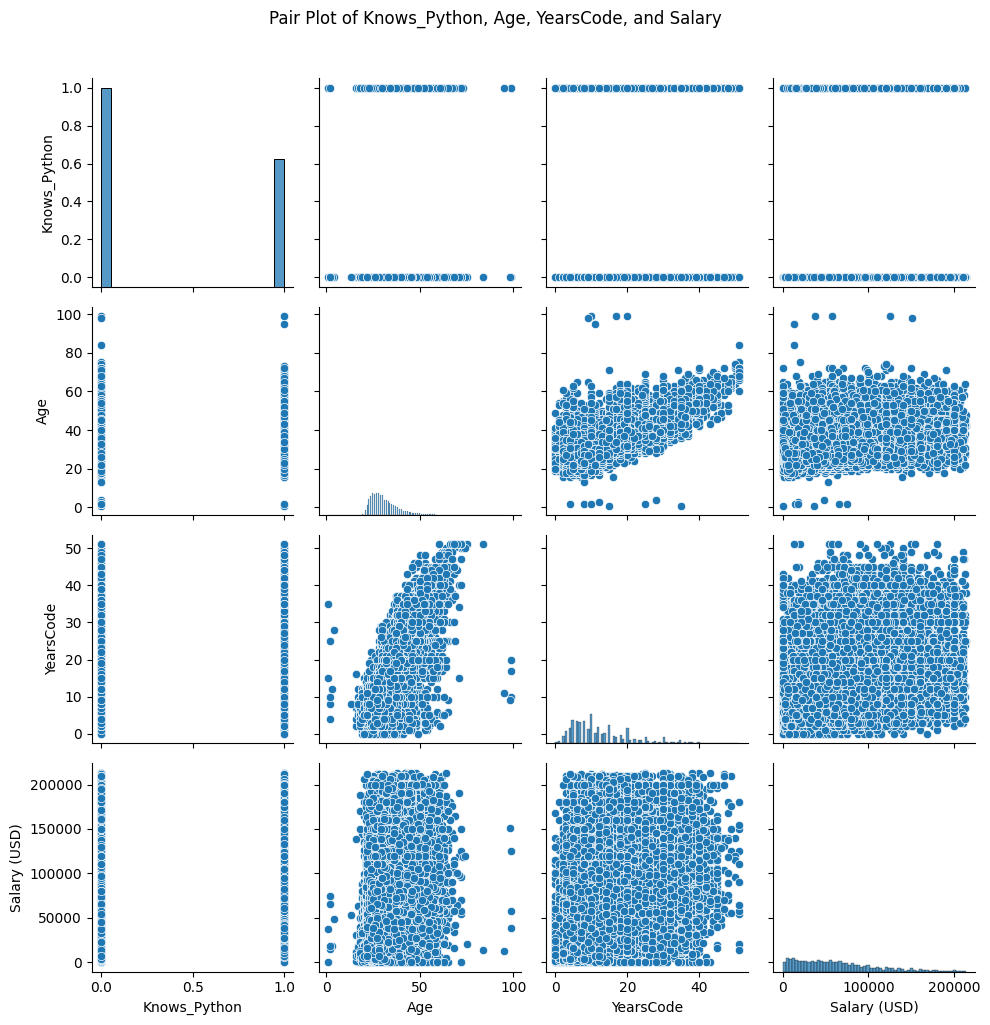

In [18]:
# Creating Heatmap to check the ranking of Python among Developers who have 'LanguageWorkedWith' as Python and those who have 'LanguageDesireNextYear' as Python
selected_countries = ['United States', 'United Kingdom', 'India', 'Germany', 'Canada']
create_programming_languages_heatmap(df, countries=selected_countries)

# For Developers who want to learn Python
create_programming_languages_heatmap(df, countries=selected_countries, column='LanguageDesireNextYear')

# Creating heatmap, scatter plots and pair plots for the Updated DataFrame
visualization_plots()

**Analyzing the developers who know/desire to know 'Python' by calling the above declared functions**

Percentage of respondents from each country who know Python:
                   NumRespondents  NumKnowsPython  PctKnowsPython
United States               10438            4661       44.654148
India                        3120            1028       32.948718
United Kingdom               2700            1056       39.111111
Germany                      2425             989       40.783505
Canada                       1642             716       43.605359
...                           ...             ...             ...
Oman                            1               0        0.000000
Burkina Faso                    1               0        0.000000
Togo                            1               0        0.000000
Brunei Darussalam               1               0        0.000000
Mali                            1               0        0.000000

[154 rows x 3 columns]

Percentage of respondents from each country who desire to learn Python:
                   NumRespondents  NumDesirePython

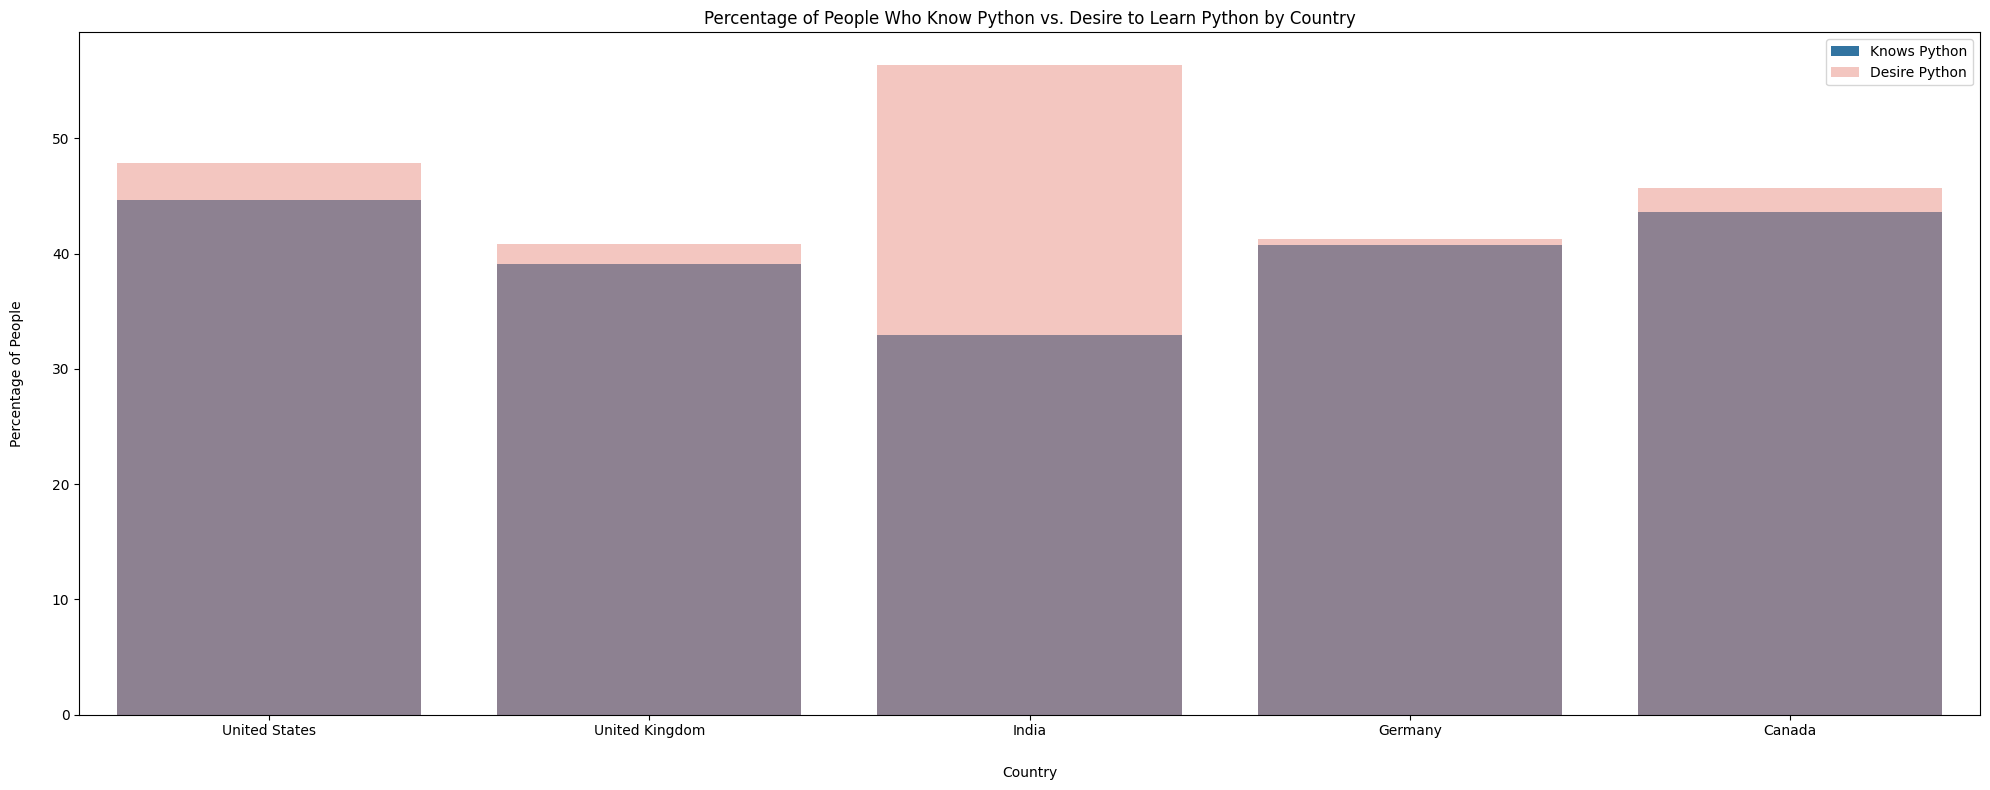

In [19]:
# Analyzing the Number of People from Each Country Know/Desire to Know 'Python'
country_group = df.groupby(['Country'])
python_analyzer = PythonAwarenessAnalyzer(df, country_group)

knows_python_df = python_analyzer.percentage_knows_python()
print("Percentage of respondents from each country who know Python:")
print(knows_python_df)

desire_python_df = python_analyzer.percentage_desire_python()
print("\nPercentage of respondents from each country who desire to learn Python:")
print(desire_python_df)

python_analyzer.visualize_python_awareness()

**Analyzing the Salaries of the Developers that know 'Python' and those who don't by calling the above declared functions**


The Average Salary of Python vs Non Python Workers is as follows:


,Average Salary (Python Users),Average Salary (Non-Python Users)
Country,,
"Venezuela, Bolivarian Republic of...",14254.285714,17168.814815
Viet Nam,17369.600000,16060.804348
Yemen,2400.000000,24564.000000
Zambia,17843.666667,6588.000000
Zimbabwe,42000.000000,37045.454545



The Average Salary of Python vs Non Python Workers in the Countries - United States, United Kingdom, India, Germany and Canada is as follows:


,Average Salary (Python Users),Average Salary (Non-Python Users)
Country,,
United States,106731.054924,104689.950147
United Kingdom,70043.357008,70481.535280
India,20418.013619,18090.888623
Germany,64321.668352,65554.630223
Canada,71940.480447,70191.623110


<Figure size 1200x800 with 0 Axes>

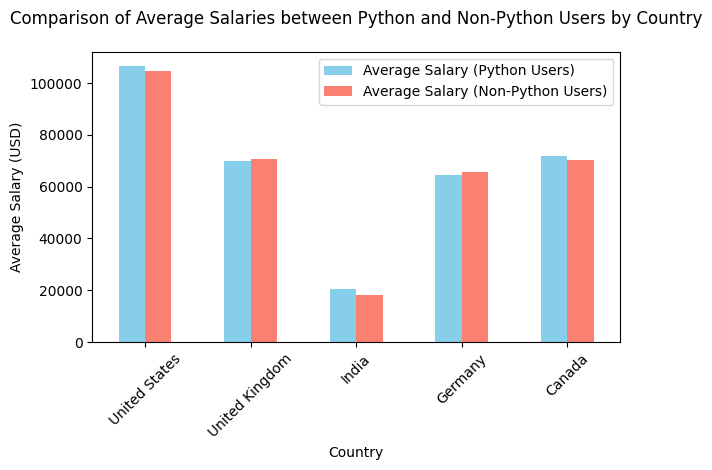

In [20]:
# Analyzing the salaries in the 5 selected countries between developers who work with Python and those who Don't
comparison_df = PythonandNonPythonSalaryCompare()
print("\nThe Average Salary of Python vs Non Python Workers is as follows:")
display(HTML(comparison_df.tail().to_html()))

print("\nThe Average Salary of Python vs Non Python Workers in the Countries - United States, United Kingdom, India, Germany and Canada is as follows:")
display(HTML(comparison_df.loc[selected_countries].head().to_html()))

# Plotting the comparison of average salaries
plot_df = comparison_df.loc[selected_countries]
AverageSalaryPlot(plot_df)

**Analyzing the desire in Students of the above mentioned countries to know 'Python' by calling the above declared functions**


Students from each country that Know/Desire to learn Python


,Total Students,Students Know Python (%),Students Desire Python (%)
Country,,,
Albania,10,30.000000,30.000000
Algeria,4,0.000000,25.000000
Argentina,92,32.608696,44.565217
Armenia,7,71.428571,100.000000
Australia,78,53.846154,52.564103



Students from Countries - United States, United Kingdom, India, Germany and Canada that Know/Desire to learn Python


,Total Students,Students Know Python (%),Students Desire Python (%)
Country,,,
United States,857,64.760793,65.227538
United Kingdom,170,51.764706,54.117647
India,623,28.571429,52.487961
Germany,411,54.014599,53.041363
Canada,140,54.285714,57.857143


<Figure size 1200x800 with 0 Axes>

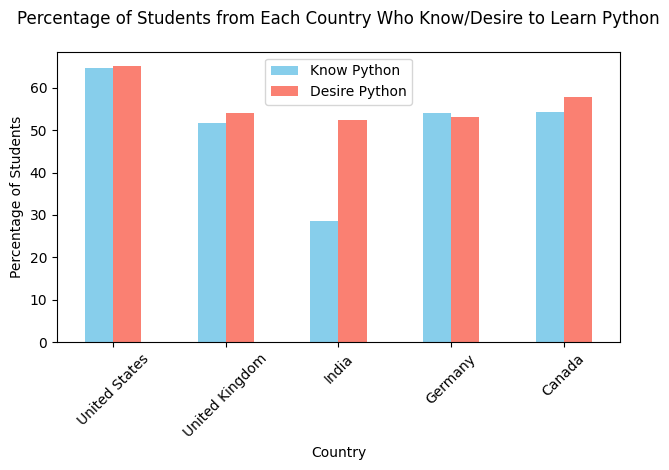

In [21]:
# Analyzing the students from each country that know Python and desire to know Python
student_df = df[df['Student'].isin(['Yes, full-time', 'Yes, part-time'])]
result_df = StudentPythonInterest(student_df)
print("\nStudents from each country that Know/Desire to learn Python")
display(HTML(result_df.head().to_html()))

print("\nStudents from Countries - United States, United Kingdom, India, Germany and Canada that Know/Desire to learn Python")
display(HTML(result_df.loc[selected_countries].head().to_html()))

StudentPlot(result_df.loc[selected_countries])

**Analyzing the Most Widely Used Social Media Platforms in the user entered country**

In [27]:
# Analyzing the Social Media Platform that can be used for each country for Marketing
class CountryNotFoundError(Exception):
    def __init__(self, country):
        self.country = country
        super().__init__(f"Country '{country}' not found in the DataFrame.")

def get_social_media_count(df, country):
    try:
        # Filtering the DataFrame for the specified country
        country_df = df[df['Country'] == country]

        # Checking if the DataFrame is empty (i.e., country not found)
        if country_df.empty:
            raise CountryNotFoundError(country)

        # Getting the count of each social media platform used by the country
        social_media_counts = country_df['SocialMedia'].value_counts()

        # Displaying the counts
        print("Counts for the Social Media Platforms used by {}:\n".format(country))
        print(social_media_counts)

        # Returning the counts
        return social_media_counts

    except KeyError as e:
        print("Error: '{}' column not found in the DataFrame.".format('SocialMedia'))
        return None

    except CountryNotFoundError as e:
        print(e)
        return None

    except Exception as e:
        print("An unexpected error occurred:", e)
        return None

# Example usage
country = input("Please enter the country for which 'Counts' for 'Social Media Platform Usage' is required:")
social_media_count = get_social_media_count(df, country)

Please enter the country for which 'Counts' for 'Social Media Platform Usage' is required:United States
Counts for the Social Media Platforms used by United States:

Reddit                      3210
Twitter                     1916
Facebook                    1593
YouTube                     1098
Instagram                    899
I don't use social media     793
LinkedIn                     487
WhatsApp                     292
Snapchat                     119
WeChat 微信                     26
VK ВКонта́кте                  4
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64


**Calculating the Hourly Salary of Each Respondent and Adding a new Column to the Original DataFrame**

In [23]:
# Using Data Function to Calculate the Hourly Salary of Each Developer
def calculate_hourly_wage(salary, hours_per_week):
    # Assuming 52 weeks in a year
    weekly_salary = salary / 52
    hourly_wage = weekly_salary / (hours_per_week or 1)  # Avoiding division by zero
    return hourly_wage

df_2 = df.copy()
df_2['HourlyWage'] = df_2.apply(lambda row: calculate_hourly_wage(row['Salary (USD)'], row['WorkWeekHrs']), axis=1)
display(HTML(df_2.head().to_html()))

,MainBranch,Coding (Hobby),Employment,Country,Student,EdLevel,UndergradMajor,YearsCode,Salary (USD),WorkWeekHrs,LanguageWorkedWith,LanguageDesireNextYear,SocialMedia,Age,Gender,HourlyWage
Respondent,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,3,8820.0,40.0,HTML/CSS,Elixir;HTML/CSS,Reddit,28.0,Man,4.240385
4,I am a developer by profession,No,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",3,61000.0,80.0,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Reddit,22.0,Man,14.663462
9,I am a developer by profession,Yes,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",12,95179.0,32.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,Twitter,23.0,Man,57.198918
13,I am a developer by profession,Yes,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering",17,90000.0,40.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL;TypeScript,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust;SQL;TypeScript;WebAssembly,Twitter,28.0,Man,43.269231
14,I am a developer by profession,Yes,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or software engineering",13,57060.0,40.0,C++,C++,Reddit,31.0,Man,27.432692
